# BIS Triennial Central Bank Surveys

## Global foreign exchange market

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from dbnomics import fetch_series

In [3]:
# Paramétrage des styles utilisés par matplotlib
plt.style.use('default')
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

Data provider: BIS

Datasets: WS_DER_OTC_TOV

Parameters: 

* Frequency
* Measure
* Instrument
* Risk category -> Forex ("B")
* Reporting country
* Counterparty sector
* Counterparty country
* Underlying risk sector
* Currency leg 1
* Currency leg 2
* Maturity
* Rating (outstanding) or settlement (FX turnover)
* Execution method
* Basis

A.U.A.B.5J.A.5J.A.TO1.TO1.A.A.3.C

In [69]:
def download_and_clean_data(id, parameter):
    
    # Selected years correspond to the BIS Triennial Central Bank Survey dates
    dates = [1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019, 2022]

    # Fetch series data from DBnomics.world for all matching series (using '..' wildcard)
    df = fetch_series("BIS","WS_DER_OTC_TOV",id, max_nb_series=60) 

    # Keep only relevant columns: time, value, and the parameter
    df = df[["original_period", "original_value", parameter]]

    # Convert period and value to numeric, coercing any errors to NaN
    df["original_period"] = pd.to_numeric(df["original_period"], errors='coerce')
    df["original_value"] = pd.to_numeric(df["original_value"], errors='coerce')

    # Filter data to keep only the selected survey years
    df = df[df["original_period"].isin(dates)]

    # Reshape the data: rows = years, columns = parameter, values = turnover
    df = df.pivot(index='original_period', columns=parameter, values='original_value')

    # Remove index name for cleaner plot
    df.index.name = None

    return df

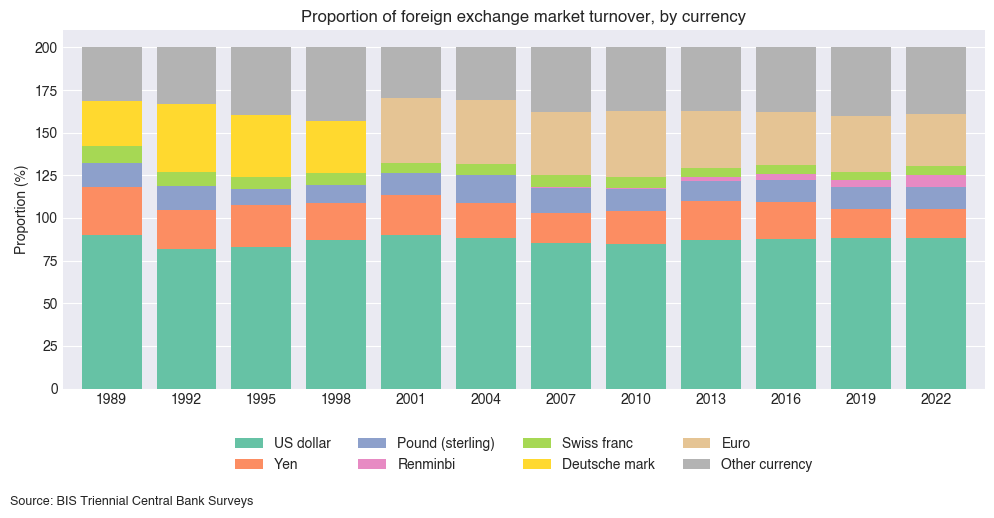

In [70]:
df = download_and_clean_data (id = 'A.U.A.B.5J.A.5J.A..TO1.A.A.3.C', parameter = 'Currency leg 1')

# List of main currencies to isolate
#df.columns
currencies = ['US dollar', 'Yen', 'Pound (sterling)', 'Renminbi', 'Swiss franc', 'Deutsche mark', 'Euro']

# Compute residual "Other currency" by subtracting known currencies from total (adjusted for double-counting)
df['Other currency'] = 2*df['Total (all currencies)'] - df[currencies].sum(axis=1)

# Convert absolute values to percentages of total turnover
df = df.div(df['Total (all currencies)'], axis=0) * 100

# Plot stacked bar chart of currency shares over time
df[currencies+['Other currency']].plot(kind="bar", stacked=True, figsize=(10, 5), colormap="Set2", width=0.8)

# Add plot title and labels
#plt.title("Proportion du turnover du marché des changes, par devises")
plt.title("Proportion of foreign exchange market turnover, by currency")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=0)
plt.grid(axis="x", visible=False)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=4)
plt.figtext(0.01, -0.02, "Source: BIS Triennial Central Bank Surveys", ha="left", fontsize=9)
plt.tight_layout()
plt.show()


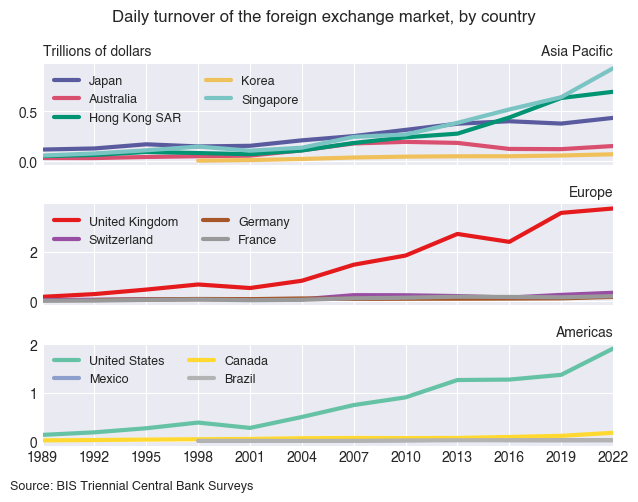

In [72]:
df = download_and_clean_data (id = 'A.U.A.B..A.5J.A.TO1.TO1.A.A.3.B', parameter = 'Reporting country')
df = df/1000000

american_countries = ['United States', 'Mexico', 'Canada', 'Brazil']
european_countries = ['United Kingdom', 'Switzerland', 'Germany', 'France']
asian_countries = ['Japan', 'Australia', 'Hong Kong SAR', 'Korea', 'Singapore']

fig, axs = plt.subplots(nrows=3, ncols=1) # 3 subplots
df[asian_countries].plot(ax=axs[0],linewidth=3)
df[european_countries].plot(ax=axs[1], colormap="Set1",linewidth=3)
df[american_countries].plot(ax=axs[2], colormap="Set2",linewidth=3)
axs[0].tick_params(axis='x', which='both', length=0, labelbottom=False)
axs[1].tick_params(axis='x', which='both', length=0, labelbottom=False)
axs[0].set_title("Trillions of dollars", loc="left", fontsize=10)
axs[0].set_title("Asia Pacific", loc="right", fontsize=10)
axs[1].set_title("Europe", loc="right", fontsize=10)
axs[2].set_title("Americas", loc="right", fontsize=10)
for i in range(3):
    axs[i].set_xticks([1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019, 2022])
    axs[i].set_xmargin(0)
axs[0].legend(df[asian_countries], ncol=2, fontsize=9)
axs[1].legend(df[european_countries], ncol=2, fontsize=9)
axs[2].legend(df[american_countries], ncol=2, fontsize=9)
#fig.suptitle("Turnover quotidien du marché des changes, par pays")
fig.suptitle("Daily turnover of the foreign exchange market, by country")
fig.text(0.01, -0.02, "Source: BIS Triennial Central Bank Surveys", ha="left", fontsize=9)
fig.tight_layout()


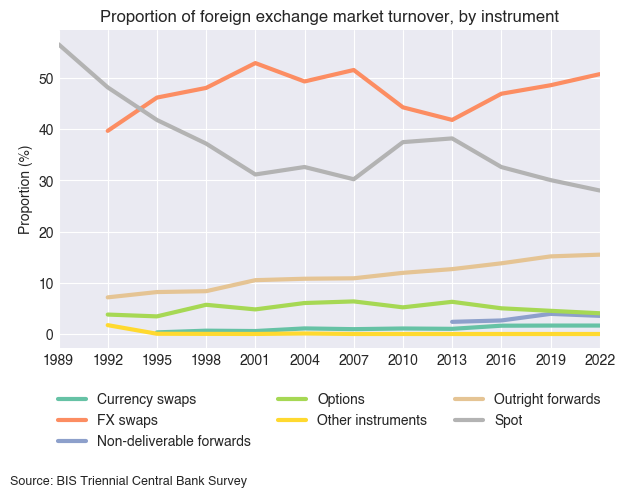

In [81]:
df = download_and_clean_data (id = 'A.U..B.5J.A.5J.A.TO1.TO1.A.A.3.C', parameter = 'Instrument')

instruments = ['Currency swaps', 'FX swaps', 'Non-deliverable forwards', 'Options', 'Other instruments', 'Outright forwards', 'Spot']

df = df.div(df['Total (all instruments)'], axis=0) * 100

fig, ax = plt.subplots()
df[instruments].plot(ax=ax, colormap="Set2",  linewidth=3)
#ax.set_title('Proportion du turnover du marché des changes, par instruments')
ax.set_title('Proportion of foreign exchange market turnover, by instrument')
ax.set_xticks([1989, 1992, 1995, 1998, 2001, 2004, 2007, 2010, 2013, 2016, 2019, 2022], )
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=3)
ax.set_xmargin(0)
ax.set_ylabel("Proportion (%)")
fig.text(0.01, -0.02, "Source: BIS Triennial Central Bank Survey", ha="left", fontsize=9)
fig.tight_layout()
